In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython import display

In [2]:
from settings.types import Env, Model, H, Enc
from src.model_spinboson import SSpinBosonSimulation, DSpinBosonSimulation
from src.model_twolevel import TwoLvlSimulation
from src.model_js import JCSimulation
import src.plot_simulations as plotting
import src.plot_illustrations as illustrations

In [3]:
# set up matplotlib
%matplotlib inline 
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )

In [4]:
# setup plot styling
from settings.plot_styles import SIZE_MARGIN, SIZE_TEXT, extended_palette
sns.set_theme() 
# style="ticks", 'whitegrid'
# palette=extended_palette

# Fig 2, 3: Circuit implementation of the dissipation

In [5]:

adc_ltx, adc = illustrations.circuit_adc()
print(adc)

d_ltx, d = illustrations.circuit_dissipation()
print(d)

    Ry($\theta$) ┌───┐     
s: ──────■───────┤ X ├─────
     ┌───┴───┐   └─┬─┘     
a: ──┤ Ry(π) ├─────■───|0>─
     └───────┘             
   ┌────┐     
s: ┤0   ├─────
   │  D │     
a: ┤1   ├─|0>─
   └────┘     


# Fig 3: Circuit schematic

In [6]:
sb1s_ltx, sb1s = illustrations.circuit_sb1s()
print(sb1s)

sb2s_ltx, sb2s = illustrations.circuit_sb2s()
print(sb2s)

           ░ ┌────┐      ┌────┐      ┌────┐       ░ ┌───┐
b_0: ──────░─┤0   ├──────┤0   ├──────┤0   ├───────░─┤ M ├
           ░ │    │      │    │      │    │       ░ ├───┤
b_1: ──────░─┤1 U ├──────┤1 U ├──────┤1 U ├───────░─┤ M ├
     ┌───┐ ░ │    │┌────┐│    │┌────┐│    │┌────┐ ░ ├───┤
  s: ┤ X ├─░─┤2   ├┤0   ├┤2   ├┤0   ├┤2   ├┤0   ├─░─┤ M ├
     └───┘ ░ └────┘│  D │└────┘│  D │└────┘│  D │ ░ └───┘
  a: ──────░───────┤1   ├─|0>──┤1   ├─|0>──┤1   ├─░──────
           ░       └────┘      └────┘      └────┘ ░      
                   ┌────┐      ┌────┐      ┌────┐        
 a1: ──────────────┤0   ├─|0>──┤0   ├─|0>──┤0   ├────────
     ┌───┐ ░ ┌────┐│  D │┌────┐│  D │┌────┐│  D │ ░ ┌───┐
 s1: ┤ X ├─░─┤0   ├┤1   ├┤0   ├┤1   ├┤0   ├┤1   ├─░─┤ M ├
     └───┘ ░ │    │└────┘│    │└────┘│    │└────┘ ░ ├───┤
b_0: ──────░─┤1   ├──────┤1   ├──────┤1   ├───────░─┤ M ├
           ░ │  U │      │  U │      │  U │       ░ ├───┤
b_1: ──────░─┤2   ├──────┤2   ├──────┤2   ├───────░─┤ M ├
           ░ │

# Fig 4: Spin-Boson model with a single spin, coupled to an markovian environment

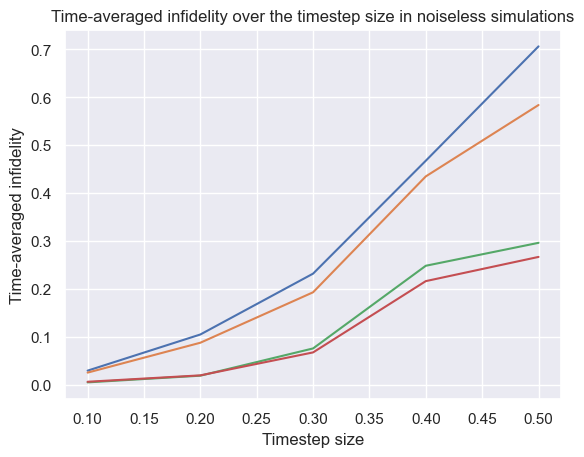

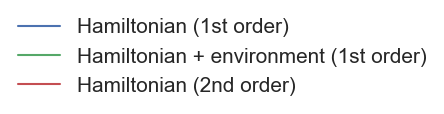

In [7]:
fig, legend = plotting.plot_ifid_vs_dt_env()
# display.Image(fig)
# display.Image(legend)

# Fig 5:

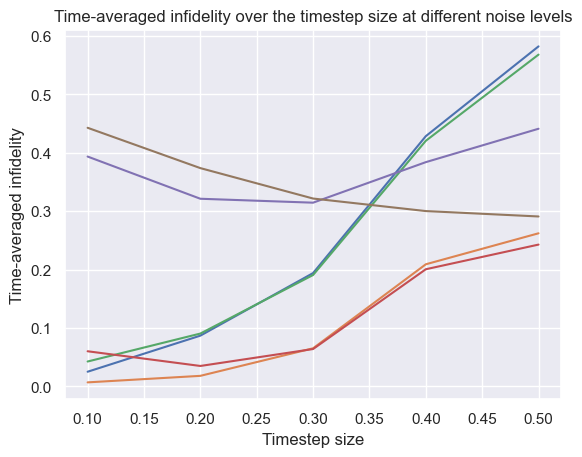

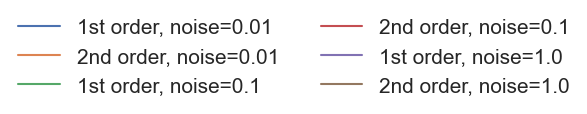

In [8]:
fig, legend = plotting.plot_ifid_vs_dt_noises()
# display.Image(fig)
# display.Image(legend)

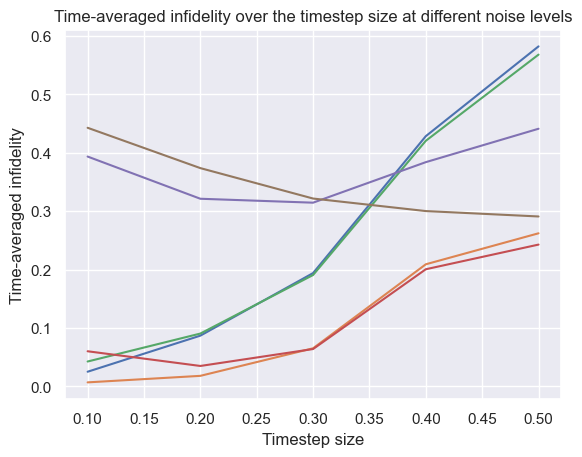

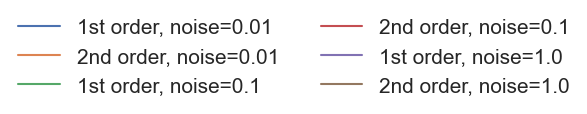

In [9]:
fig, legend = plotting.plot_ifid_vs_dt_noises()
# display.Image(fig)
# display.Image(legend)

# Fig 6:

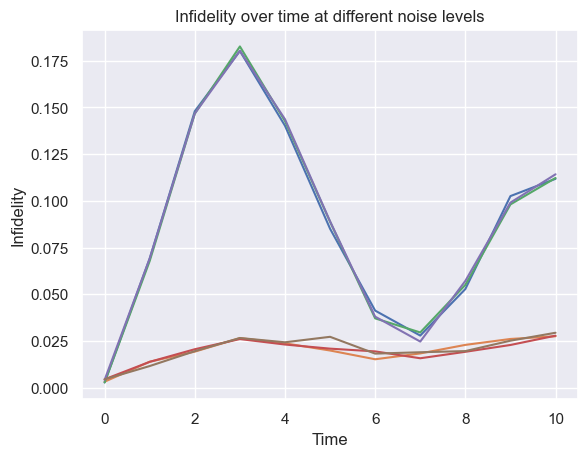

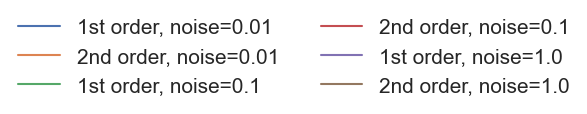

In [10]:
fig, legend = plotting.plot_ifid_vs_time()
# display.Image(fig)
# display.Image(legend)

# Fig 7:

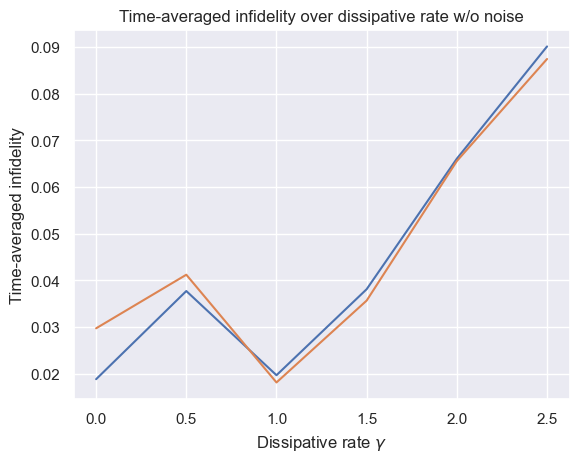

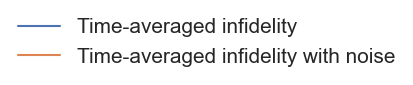

In [11]:
fig, legend = plotting.plot_ifid_vs_gamma()
# display.Image(fig)
# display.Image(legend)

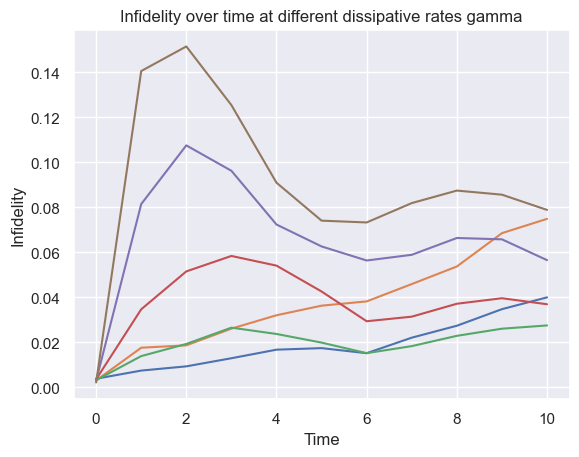

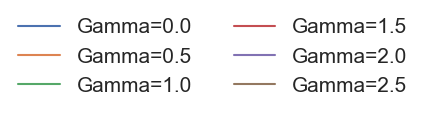

In [12]:
fig, legend = plotting.plot_ifid_vs_time_gammas()
# display.Image(fig)
# display.Image(legend)

# Fig 8:

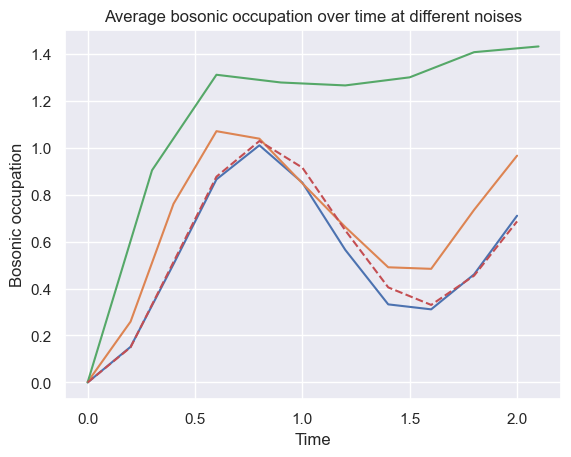

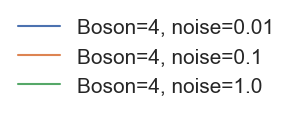

In [13]:
fig, legend = plotting.plot_bosons(bosons=[4])
# display.Image(fig)
# display.Image(legend)

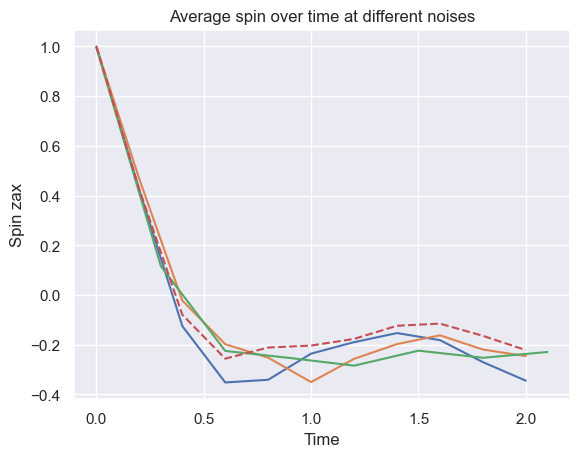

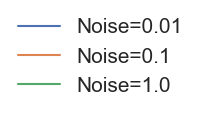

In [14]:
fig, legend = plotting.plot_spin()
# display.Image(fig)
# display.Image(legend)

# Fig A1: Qubit connectivity

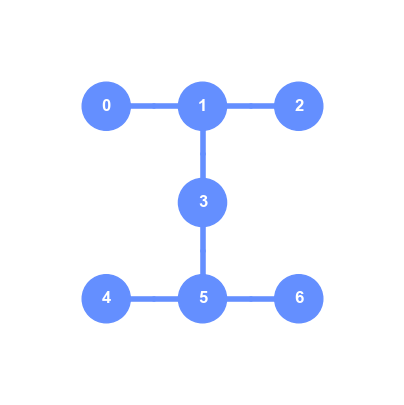

In [15]:
from qiskit.visualization import plot_gate_map, plot_circuit_layout
from qiskit.providers.fake_provider import FakeJakarta, FakeToronto
plot_gate_map(backend=FakeJakarta())

# Tab A1: Number of gates

In [16]:
# for h in [H.FRSTORD, H.SCNDORD, H.ISODECOMP]:
#     for sim in [SSpinBosonSimulation(h=h), DSpinBosonSimulation(h=h)]:
#         depth, gates, n_single, n_cx = sim.get_gates(sim.backend, initial=True)
#         print(f'One Trotter step requires {n_single} single-qubit- and {n_cx} CX-Gates.')


# Fig A2: ADC circuit transpiled onto IBM Jakarta

In [17]:
sim = TwoLvlSimulation(env=Env.ADC)
qc = sim.circuit_example(FakeJakarta(), initial=False)
print(qc)

global phase: 3π/4
                                                                               »
ancilla_0 -> 0 ────────────────────────────────────────────────────────────────»
               ┌──────────┐     ┌────┐    ┌────────┐                   ┌────┐  »
      s_0 -> 1 ┤ Rz(-π/2) ├─────┤ √X ├────┤ Rz(-π) ├─────────────■─────┤ √X ├──»
               └──────────┘     └────┘    └────────┘             │     └────┘  »
ancilla_1 -> 2 ──────────────────────────────────────────────────┼─────────────»
                  ┌────┐   ┌─────────────┐  ┌────┐  ┌─────────┐┌─┴─┐┌─────────┐»
      a_0 -> 3 ───┤ √X ├───┤ Rz(0.91911) ├──┤ √X ├──┤ Rz(π/2) ├┤ X ├┤ Rz(π/2) ├»
                  └────┘   └─────────────┘  └────┘  └─────────┘└───┘└─────────┘»
ancilla_2 -> 4 ────────────────────────────────────────────────────────────────»
                                                                               »
ancilla_3 -> 5 ────────────────────────────────────────────────────────────────»
         

# Ommited: Circuit for one trotter step transpiled onto IBM Jakarta

In [18]:
sim = SSpinBosonSimulation()
qc = sim.circuit_example(FakeJakarta(), initial=False)
print(qc)

                                                                      »
ancilla_0 -> 0 ───────────────────────────────────────────────────────»
               ┌─────────┐     ┌────┐    ┌─────────┐    ┌───┐         »
      b_1 -> 1 ┤ Rz(π/2) ├─────┤ √X ├────┤ Rz(π/2) ├────┤ X ├─────■───»
               ├─────────┤     ├────┤    ├─────────┤    └─┬─┘   ┌─┴─┐ »
      b_0 -> 2 ┤ Rz(π/2) ├─────┤ √X ├────┤ Rz(π/2) ├──────┼─────┤ X ├─»
               ├─────────┤     ├────┤    ├─────────┴┐     │     ├───┴┐»
      s_0 -> 3 ┤ Rz(π/2) ├─────┤ √X ├────┤ Rz(-π/4) ├─────■─────┤ √X ├»
               └──┬────┬─┘┌────┴────┴───┐└──┬────┬──┘┌─────────┐└────┘»
      a_0 -> 4 ───┤ √X ├──┤ Rz(0.91911) ├───┤ √X ├───┤ Rz(π/2) ├──────»
                  └────┘  └─────────────┘   └────┘   └─────────┘      »
ancilla_1 -> 5 ───────────────────────────────────────────────────────»
                                                                      »
ancilla_2 -> 6 ─────────────────────────────────────────────────

In [19]:
sim = DSpinBosonSimulation()
qc = sim.circuit_example(FakeJakarta(), initial=False)
print(qc)

----------------------------------------
Simulating model: sb2s_adc_b4_psb2s_g1000_o1_sloop_d0300_e0100_fakejakarta
 Time-step 0.00
